In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import itertools

In [2]:
#Data for the first pattern
x1=np.array([-1,-1,1,-1,1,-1,-1,1],dtype=float)
x2=np.array([-1,-1,-1,-1,-1,1,-1,-1],dtype=float)
x3=np.array([-1,1,1,-1,-1,1,-1,1],dtype=float)
patterns=np.array([x1,x2,x3])

In [3]:
def weight(patterns, scaling=False):
    [P,n]=np.shape(patterns)
    W=np.zeros((n,n))
    for i in range (n):
        for ii in range(n):
            w = 0
            for mu in range(P):
                x_mu = patterns[mu]
                w = w + x_mu[i]*x_mu[ii]
                W[i,ii]= w
            if scaling==True:
                W[i,ii]=W[i,ii]/n
    return W

In [4]:
def sign(x):
    if x>=0:
        return 1
    else:
        return -1
    
def update(wx,theta):
    x = 0.5+0.5*np.sign(wx-theta)
    return x

# energy function
def energy_function(W,x):
    n = len(x)
    energy = 0
    for i in range(n):
        for j in range(n):
            energy += W[i,j]*x[i]*x[j]
    return -energy

### Functions used to update.


In [5]:
def update_rule_batch(W,x):
    Wx = np.dot(W,x)
    for i in range(len(Wx)):
        Wx[i] = sign(Wx[i])
    return Wx


def update_rule_sparse(W,x, theta):
    Wx = np.dot(W,x)
    for i in range(len(Wx)):
        Wx[i] = update(Wx[i], theta)
    return Wx


def update_rule_seq(W,x):
    x_copy = np.copy(x)
    dim = x.shape[0]
    for i in range(x.shape[0]):
        vec_ = 0
        for j in range(x.shape[0]):
            vec_ += np.dot(W[i][j], x_copy[j])
            if vec_ < 0:
                x_copy[i] = -1
            else:
                x_copy[i] = 1            
    return x_copy


#select units randomly
def update_rule_rand(W,x):
    new_x = np.copy(x)
    for nr in range(len(x)):
        i = np.random.randint(0,len(x))
        quantity = np.dot(W[i,:],x)
        new_x[i] = sign(quantity)
    return new_x


#### Appliance of the update rule

In [6]:
def update_rule(W,x,update, show = False, theta =0.5):
    max_iters = 50
    iterations=0
    energy_list = []
    condition=True
    x_old=np.copy(x)
    while(condition):
        if iterations == max_iters:
            break
        if update=="batch":
            x_new=update_rule_batch(W, x_old)
        elif update=="sparse":
            x_new=update_rule_sparse(W, x_old, theta)  

        elif update=="sequential":
            x_new=update_rule_seq(W, x_old)  
        elif update=="random":
            x_new=update_rule_rand(W,x_old)
            if show == True:
                disp_img(x_new)
        iterations += 1
        energy_list.append(energy_function(W,x_old))
        condition=not np.all(x_new==x_old)
        x_old=np.copy(x_new)
    return x_new, iterations, energy_list

#### • Check if the network was able to store all three patterns.

In [7]:
W = weight(patterns)
#check 
for x in patterns:
    if (np.array_equal(x,update_rule(W,x,"batch")[0])):
        print("pattern is recognized")


pattern is recognized
pattern is recognized
pattern is recognized


## 3.1 Convergence and attractors


In [8]:
x1d=np.array([1,-1,1,-1,1,-1,-1,1])
x2d=np.array([1,1,-1,-1,-1,1,-1,-1])
x3d=np.array([1,1,1,-1,1,1,-1,1])
distorted_patterns = np.array([x1d, x2d, x3d])

#x1d has a one bit error, x2d and x3d have two bit errors.

In [9]:
# Function used to update the pattern used for recognition.
# changes the memory
def updated_patterns(W, patterns, update):
    list_iterations = []
    new_patterns = []
    for mu in range(len(patterns)):
        pattern = patterns[mu]
        new_pattern, iterations, energy_list = update_rule(W,pattern,update)
        new_patterns.append(new_pattern)
        list_iterations.append(iterations) 
    return np.array(new_patterns), list_iterations

In [10]:
update = "batch"
new_patterns, list_iterations = updated_patterns(W,distorted_patterns,update)


In [11]:
for i in range(len(new_patterns)):
    if (np.array_equal(new_patterns[i], patterns[i])):
        print("they look the same")
    else:
        print("not alike")

they look the same
not alike
they look the same


#### How many attractors are there in this network?

In [12]:
all_patterns = [list(i) for i in itertools.product([-1,1], repeat=8)]

fixed_points, list_iterations = updated_patterns(W,all_patterns,"batch")
attractors = np.unique(fixed_points, axis=0)
occurences = np.zeros(len(attractors))
idx = 0
for attractor in attractors:
    for i in range(len(fixed_points)):
        if np.array_equal(attractor,fixed_points[i]):
            occurences[idx] += 1
    idx += 1

[[-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1.  1. -1. -1.  1. -1.  1.]
 [-1. -1.  1. -1.  1. -1. -1.  1.]
 [-1. -1.  1. -1.  1.  1. -1.  1.]
 [-1.  1. -1. -1. -1.  1. -1. -1.]
 [-1.  1.  1. -1. -1.  1. -1.  1.]
 [-1.  1.  1. -1.  1. -1. -1.  1.]
 [ 1. -1. -1.  1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1. -1.  1.  1. -1.]
 [ 1.  1. -1.  1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1.  1.  1.  1. -1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1.  1.  1.]]
Number of attractors 14


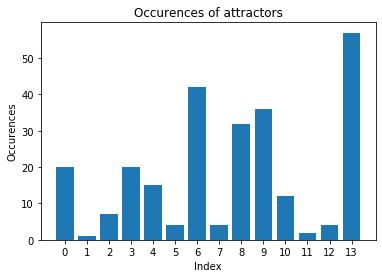

In [13]:
print(attractors)

plt.xticks(np.arange(len(attractors)))
plt.bar(range(len(attractors)), occurences)
plt.ylabel("Occurences")
plt.xlabel("Index")
plt.title("Occurences of attractors")
print("Number of attractors",len(attractors))

#### What happens when you make the starting pattern even more dissimilar to the stored ones (e.g. more than half is wrong)?

In [14]:
#all of the data have 4 errors.
x1vd=np.array([1,-1,-1,1,-1,-1,-1,1])
x2vd=np.array([1,1,1,1,-1,1,-1,-1])
x3vd=np.array([1,-1,1,-1,1,-1,-1,1])
very_distorted_patterns = np.array([x1vd, x2vd, x3vd])

new_patterns, list_iterations = updated_patterns(W,very_distorted_patterns,update)

for i in range(len(new_patterns)):
    print("The new pattern:", new_patterns[i],"after",list_iterations[i],"iterations." )
    if (np.array_equal(new_patterns[i], patterns[i])):
        print("they look the same")
    else:
        print("not alike")

# Can't recall to previous stored pattern because they are to dissimilar.

The new pattern: [ 1. -1. -1.  1.  1. -1.  1. -1.] after 2 iterations.
not alike
The new pattern: [ 1.  1. -1.  1. -1.  1.  1. -1.] after 2 iterations.
not alike
The new pattern: [-1. -1.  1. -1.  1. -1. -1.  1.] after 2 iterations.
not alike


# 3.2 Sequential update

#### load & rework image

In [15]:
img = np.genfromtxt('pict.dat', dtype = None, delimiter = ',', encoding=None)

In [16]:
def separate_data(data):
    patterns = []
    L = []
    for i in range(len(data)):
        if i%1024 == 0 and i !=0:
            patterns.append(np.array(L))
            L = []
        L.append(data[i])
    patterns.append(np.array(L))
    return patterns

In [17]:
#function to show the images
def disp_img(pattern):
    pattern = pattern.reshape(32,32)
    plt.imshow(pattern, interpolation = 'nearest')
    if np.array_equal(pattern,p10.reshape(32,32)):
        plt.title("Degraded")
    if np.array_equal(pattern,p11.reshape(32,32)):
        plt.title("Mixture")
    else:
        plt.title("Image")
    plt.show()

#### • Check that the three patterns are stable.

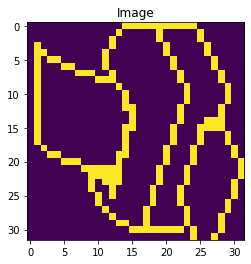

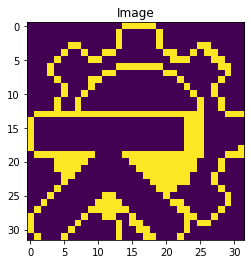

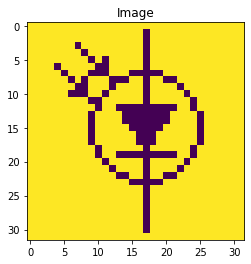

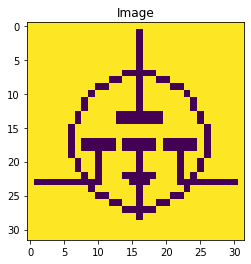

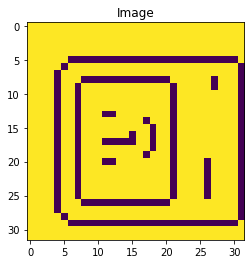

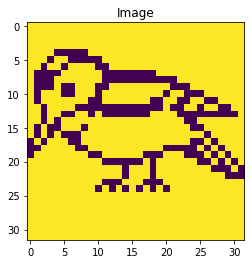

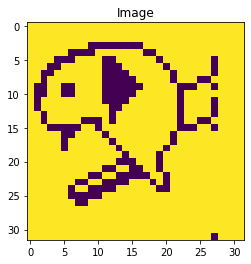

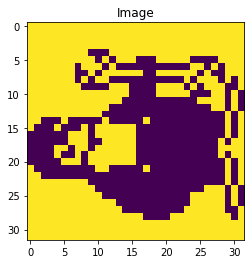

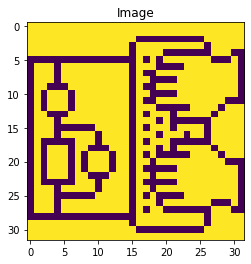

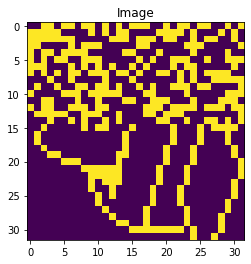

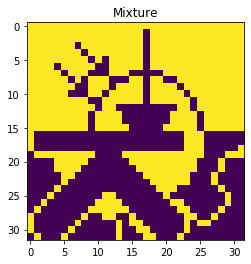

In [18]:
patterns=separate_data(img)
p1 = patterns[0]
p2 = patterns[1]
p3 = patterns[2]
p4 = patterns[3]
p5 = patterns[4]
p6 = patterns[5]
p7 = patterns[6]
p8 = patterns[7]
p9 = patterns[8]
p10 = patterns[9]
p11 = patterns[10]

for i in range(11):
    disp_img(patterns[i])

In [19]:
pic_patterns = np.array([p1, p2, p3])
W = weight(pic_patterns,True)

#### • Check that the three patterns are stable.

In [20]:
for x in pic_patterns:
    if (np.array_equal(x,update_rule(W,x,"batch")[0])):
        print("they look the same")
    else:
        print("not alike")

they look the same
they look the same
they look the same


#### • Can the network complete a degraded pattern? Try the pattern p10, which is a degraded version of p1, or p11 which is a mixture of p2 and p3.

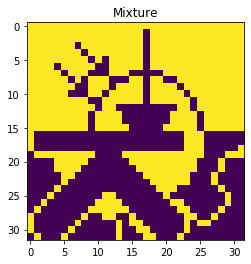

In [21]:
disp_img(p11)

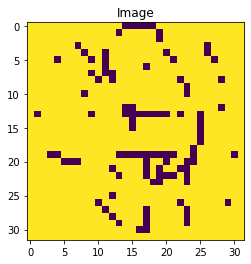

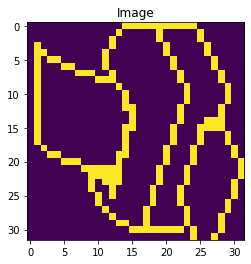

In [22]:
new_p10, iterations, energy_list = update_rule(W,p11,"batch")
disp_img(new_p10)
disp_img(p1)
if np.array_equal(p1,new_p10):
    print("They look the same")

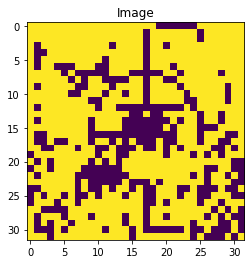

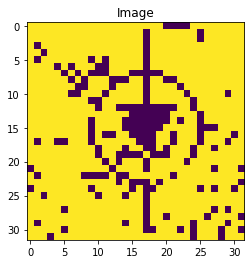

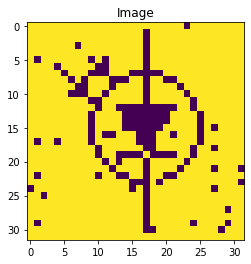

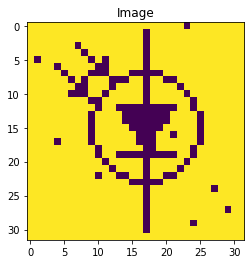

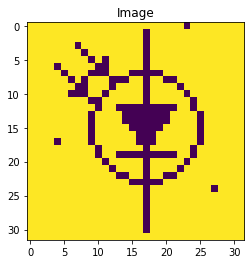

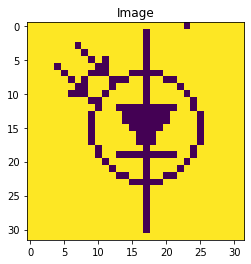

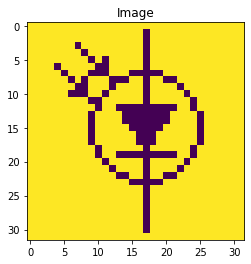

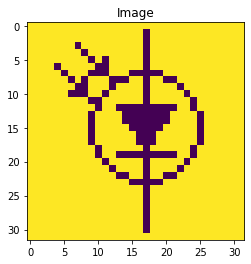

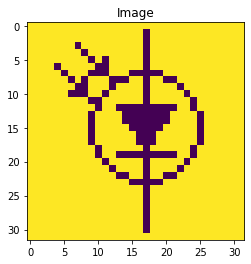

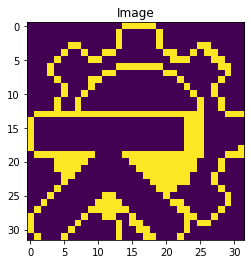

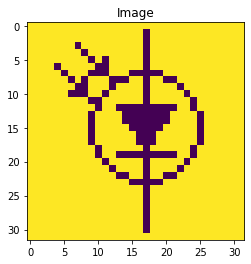

In [23]:
new_p11, iterations, energy_list = update_rule(W,p11,"random",show = True)
disp_img(new_p11)
disp_img(p2)
disp_img(p3)


In [24]:
new_p11,iterations, energy_list=update_rule(W,p11,"sequential")

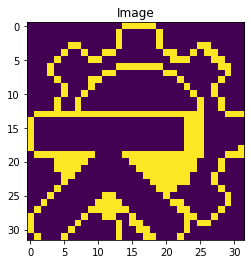

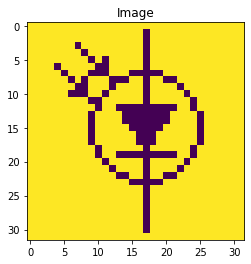

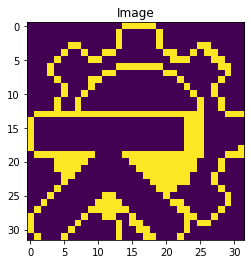

In [25]:
disp_img(p2)
disp_img(p3)
disp_img(new_p11)

 # 3.3 Energy

#### • What is the energy at the different attractors?

In [26]:
# energy at different attractors
pic_attractor = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])

for i in range(len(pic_patterns)):
    energy = energy_function(W, pic_patterns[i])
    print("Attractor {}: {}".format(i+1, energy))

Attractor 1: -1439.390625
Attractor 2: -1365.640625
Attractor 3: -1462.25


#### • What is the energy at the points of the distorted patterns?

In [27]:
pic_distorted = np.array([p4, p5, p6, p7, p8, p9, p10, p11])

for i in range(len(pic_distorted)):
    energy = energy_function(W,pic_distorted[i])
    print("Distorted/mixed image {}: {}".format(i+4, energy))

Distorted/mixed image 4: -720.48046875
Distorted/mixed image 5: -525.890625
Distorted/mixed image 6: -683.296875
Distorted/mixed image 7: -685.73046875
Distorted/mixed image 8: -171.546875
Distorted/mixed image 9: -267.51171875
Distorted/mixed image 10: -415.98046875
Distorted/mixed image 11: -173.5


#### • Follow how the energy changes from iteration to iteration when you use the sequential update rule to approach an attractor.

Text(0.5, 1.0, 'random')

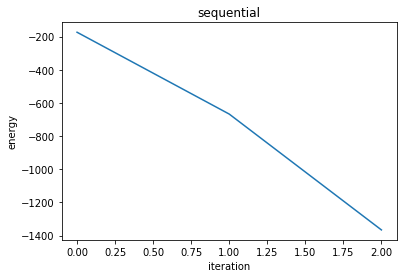

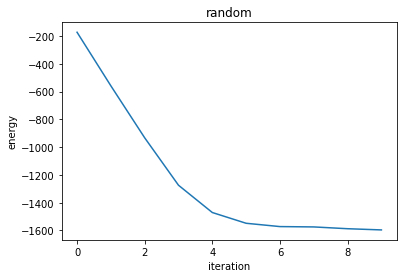

In [28]:
x_new, iterations, energy_list = update_rule(W,p11,"sequential")
plt.plot(range(iterations), energy_list)
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('sequential')

x_new, iterations, energy_list = update_rule(W,p11,"random")
plt.figure(2)
plt.plot(range(iterations), energy_list)
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('random')


Text(0.5, 1.0, 'random')

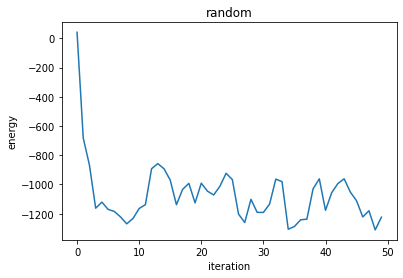

In [29]:
np.random.seed(1)
W_random = np.random.normal(0, 0.1, [1024,1024])
x_new, iterations, energy_list = update_rule(W_random,p11,"random")
plt.plot(range(iterations), energy_list)
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('random')

Text(0.5, 1.0, 'sequential')

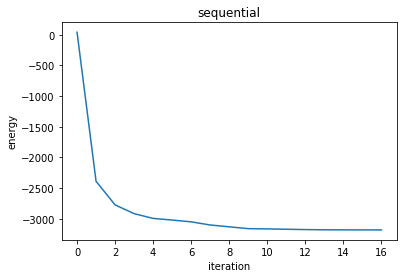

In [30]:
np.random.seed(1)
W_rand_rand = .5*(W_random+W_random.T)
x_new, iterations, energy_list = update_rule(W_rand_rand,p11,"sequential")
plt.plot(range(iterations), energy_list)
plt.xlabel('iteration')
plt.ylabel('energy')
plt.title('sequential')

# 3.4 Distortion Resistance

In [31]:
pic_patterns = np.array([p1, p2, p3])
W = weight(pic_patterns,True)

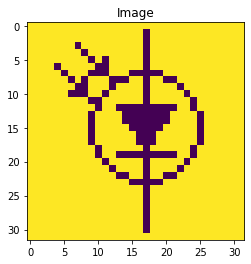

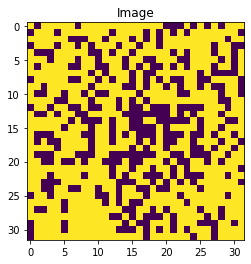

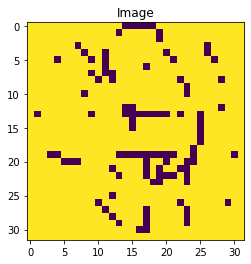

In [32]:
pattern = np.array(p3)

noise = 0.5

count = int(len(pattern)*noise)

disp_img(pattern)

for i in range(count):
    idx = np.random.randint(0,len(pattern))
    pattern[idx] = -1*pattern[idx]

disp_img(pattern)
new_p, iterations, energy_list = update_rule(W,pattern,"sequential")

disp_img(new_p)

    

• How much noise can be removed?

• Is there any difference between the three attractors with regard to noise tolerance?

For p1 and p2 about 50% noise can be removed, 30% for p3

• Does the network always converge to the right attractor? Do the extra
iterations (beyond a single-step recall) help? Do you notice any other
attractors?



# 3.5 Capacity

In [33]:
# 3.5.1

pic_patterns = np.array([p1, p2, p3, p4, p5])#, p6, p7, p8, p9])
W = weight(pic_patterns,True)


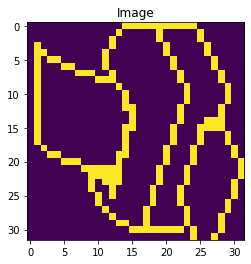

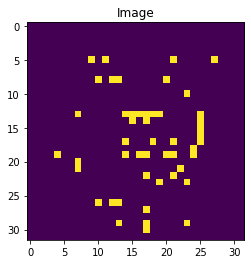

In [34]:
pattern = np.array(p1)

disp_img(pattern)

new_p, iterations, energy_list = update_rule(W,pattern,"sequential")

disp_img(new_p)


• How many patterns could safely be stored? Was the drop in performance gradual or abrupt?

3 patterns are still good, 4 there is a steep decline and 5 it is not visible anymore 


In [35]:
# 3.5.2

pat = np.zeros([9,1024])
for i in range(9):
    np.random.seed(1)
    c = np.random.normal(0,1,1024)
    pat[i,:] = np.sign(c)

pic_patterns = np.array([p1, p2, p3,pat[0,:],pat[1,:],pat[2,:]])
W = weight(pic_patterns,True)


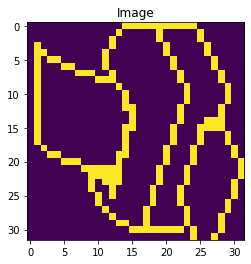

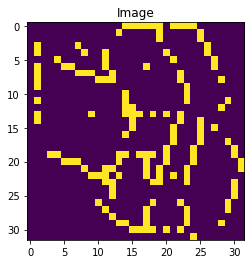

In [36]:
pattern = np.array(p1)

disp_img(pattern)

new_p, iterations, energy_list = update_rule(W,pattern,"sequential")

disp_img(new_p)


• Try to repeat this with learning a few random patterns instead of the pictures and see if you can store more

It can store more with random patterns. 


• It has been shown that the capacity of a Hopfield network is around
0.138N. How do you explain the difference between random patterns
and the pictures?



In [37]:
# 3.5.4

npat = 300 
units = 100 

pat = np.zeros([npat,units])

for i in range(npat):
    c = np.random.normal(0,1,units)
    pat[i,:] = np.sign(c)

save_1 = np.zeros(npat)

for p in range(1,npat): 
    pic_patterns = np.array(pat[0:p])
    W = weight(pic_patterns,True)
    
    success = 0
    for j in range(p-1):
        pattern = pat[j]
        
        x = update_rule_batch(W,pattern)
        if np.array_equal(x,pattern):
            success += 1

    success /= p
    print('on p:{} out of 300.'.format(p))
 
    save_1[p] = success



on p:1 out of 300.
on p:2 out of 300.
on p:3 out of 300.
on p:4 out of 300.
on p:5 out of 300.
on p:6 out of 300.
on p:7 out of 300.
on p:8 out of 300.
on p:9 out of 300.
on p:10 out of 300.
on p:11 out of 300.
on p:12 out of 300.
on p:13 out of 300.
on p:14 out of 300.
on p:15 out of 300.
on p:16 out of 300.
on p:17 out of 300.
on p:18 out of 300.
on p:19 out of 300.
on p:20 out of 300.
on p:21 out of 300.
on p:22 out of 300.
on p:23 out of 300.
on p:24 out of 300.
on p:25 out of 300.
on p:26 out of 300.
on p:27 out of 300.
on p:28 out of 300.
on p:29 out of 300.
on p:30 out of 300.
on p:31 out of 300.
on p:32 out of 300.
on p:33 out of 300.
on p:34 out of 300.
on p:35 out of 300.
on p:36 out of 300.
on p:37 out of 300.
on p:38 out of 300.
on p:39 out of 300.
on p:40 out of 300.
on p:41 out of 300.
on p:42 out of 300.
on p:43 out of 300.
on p:44 out of 300.
on p:45 out of 300.
on p:46 out of 300.
on p:47 out of 300.
on p:48 out of 300.
on p:49 out of 300.
on p:50 out of 300.
on p:51 o

Text(0.5, 1.0, 'Convergence')

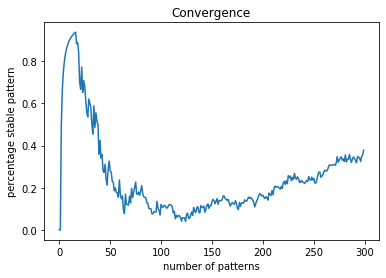

In [38]:
plt.plot(range(npat),save_1)
plt.xlabel('number of patterns')
plt.ylabel('percentage stable pattern')
plt.title('Convergence')

In [39]:
# add noise fucntion
def add_noise(pattern, noise_lvl):
    count = int(len(pattern)*noise)
    noisy_pattern = pattern
    for i in range(count):
        idx = np.random.randint(0,len(pattern))
        noisy_pattern[idx] = -1*pattern[idx]
    return noisy_pattern

In [40]:
# 3.5.5 
rand_pat = [np.random.choice([-1, 1], units) for k in range(npat)]
rand_pat = np.array(rand_pat)
noise_pat = add_noise(rand_pat, 0.5)

save_2 = np.zeros(npat)

for p in range(1,npat): 
    pic_patterns = np.array(rand_pat[0:p])
    W = weight(pic_patterns,True)
    
    success = 0
    for j in range(p-1):
        
        pattern = rand_pat[j]
        noise_pattern = noise_pat[j]
        
        x = update_rule_batch(W,noise_pattern)
        if np.array_equal(x,pattern):
            success += 1

    success /= p
    print('on p:{} out of 300.'.format(p))
    save_2[p] = success
    


on p:1 out of 300.
on p:2 out of 300.
on p:3 out of 300.
on p:4 out of 300.
on p:5 out of 300.
on p:6 out of 300.
on p:7 out of 300.
on p:8 out of 300.
on p:9 out of 300.
on p:10 out of 300.
on p:11 out of 300.
on p:12 out of 300.
on p:13 out of 300.
on p:14 out of 300.
on p:15 out of 300.
on p:16 out of 300.
on p:17 out of 300.
on p:18 out of 300.
on p:19 out of 300.
on p:20 out of 300.
on p:21 out of 300.
on p:22 out of 300.
on p:23 out of 300.
on p:24 out of 300.
on p:25 out of 300.
on p:26 out of 300.
on p:27 out of 300.
on p:28 out of 300.
on p:29 out of 300.
on p:30 out of 300.
on p:31 out of 300.
on p:32 out of 300.
on p:33 out of 300.
on p:34 out of 300.
on p:35 out of 300.
on p:36 out of 300.
on p:37 out of 300.
on p:38 out of 300.
on p:39 out of 300.
on p:40 out of 300.
on p:41 out of 300.
on p:42 out of 300.
on p:43 out of 300.
on p:44 out of 300.
on p:45 out of 300.
on p:46 out of 300.
on p:47 out of 300.
on p:48 out of 300.
on p:49 out of 300.
on p:50 out of 300.
on p:51 o

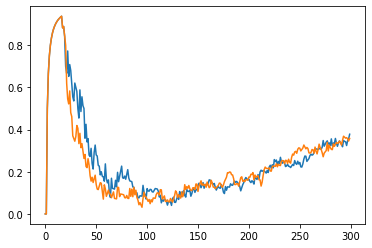

In [41]:
plt.plot(range(npat),save_1)
plt.plot(range(npat),save_2)

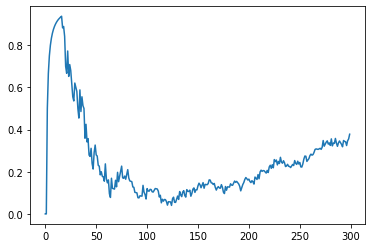

In [42]:
plt.plot(range(npat),save_1)


In [43]:
# 3.5.6 

npat = 300 
units = 100 

pat = np.zeros([npat,units])

for i in range(npat):
    c = np.random.normal(0,1,units)
    pat[i,:] = np.sign(c)

rand_pat = [np.random.choice([-1, 1], units) for k in range(npat)]
rand_pat = np.array(rand_pat)
noise_pat = add_noise(rand_pat, 0.5)

save_11 = np.zeros(npat)
save_22 = np.zeros(npat)


for p in range(1,npat): 
    pic_patterns = np.array(pat[0:p])
    pic_patterns_noise = np.array(rand_pat[0:p])
    
    W = weight(pic_patterns,True)
    Wnoise = weight(pic_patterns_noise,True)
    
    nn = W.shape[0]
    W[range(nn), range(nn)] = 0
    nn = Wnoise.shape[0]
    Wnoise[range(nn), range(nn)] = 0
    
    success = 0
    noise_success = 0
    for j in range(p-1):
        pattern = pat[j]
        
        rand_pattern = rand_pat[j]
        noise_pattern = noise_pat[j]

        x = update_rule_batch(W,pattern)
        xnoise = update_rule_batch(Wnoise,noise_pattern)
        
        if np.array_equal(x,pattern):
            success += 1

        if np.array_equal(xnoise,rand_pattern):
            noise_success += 1

    success /= p
    noise_success /=p
    print('on p:{} out of 300.'.format(p))
 
    save_11[p] = success    
    save_22[p] = noise_success



on p:1 out of 300.
on p:2 out of 300.
on p:3 out of 300.
on p:4 out of 300.
on p:5 out of 300.
on p:6 out of 300.
on p:7 out of 300.
on p:8 out of 300.
on p:9 out of 300.
on p:10 out of 300.
on p:11 out of 300.
on p:12 out of 300.
on p:13 out of 300.
on p:14 out of 300.
on p:15 out of 300.
on p:16 out of 300.
on p:17 out of 300.
on p:18 out of 300.
on p:19 out of 300.
on p:20 out of 300.
on p:21 out of 300.
on p:22 out of 300.
on p:23 out of 300.
on p:24 out of 300.
on p:25 out of 300.
on p:26 out of 300.
on p:27 out of 300.
on p:28 out of 300.
on p:29 out of 300.
on p:30 out of 300.
on p:31 out of 300.
on p:32 out of 300.
on p:33 out of 300.
on p:34 out of 300.
on p:35 out of 300.
on p:36 out of 300.
on p:37 out of 300.
on p:38 out of 300.
on p:39 out of 300.
on p:40 out of 300.
on p:41 out of 300.
on p:42 out of 300.
on p:43 out of 300.
on p:44 out of 300.
on p:45 out of 300.
on p:46 out of 300.
on p:47 out of 300.
on p:48 out of 300.
on p:49 out of 300.
on p:50 out of 300.
on p:51 o

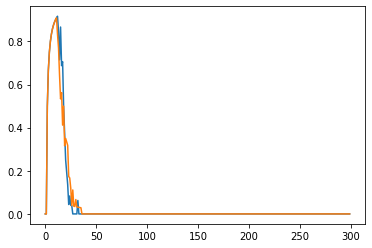

In [44]:
plt.plot(range(npat),save_11)
plt.plot(range(npat),save_22)

In [45]:
# 3.5.7

npat = 75 
units = 100 

pat = np.zeros([npat,units])

for i in range(npat):
    c = np.random.normal(0,1,units)
    c = c+0.5
    pat[i,:] = np.sign(c)


rand_pat = np.zeros([npat,units])

for i in range(npat):
    c = np.random.normal(0,1,units)
    c = c+0.5
    rand_pat[i,:] = np.sign(c)

noise_pat = add_noise(rand_pat, 0.5)

save_11 = np.zeros(npat)
save_22 = np.zeros(npat)


for p in range(1,npat): 
    pic_patterns = np.array(pat[0:p])
    pic_patterns_noise = np.array(rand_pat[0:p])
    
    W = weight(pic_patterns,True)
    Wnoise = weight(pic_patterns_noise,True)
    
    nn = W.shape[0]
    W[range(nn), range(nn)] = 0
    nn = Wnoise.shape[0]
    Wnoise[range(nn), range(nn)] = 0
    
    success = 0
    noise_success = 0
    for j in range(p-1):
        pattern = pat[j]
        
        rand_pattern = rand_pat[j]
        noise_pattern = noise_pat[j]

        x = update_rule_batch(W,pattern)
        xnoise = update_rule_batch(Wnoise,noise_pattern)
        
        if np.array_equal(x,pattern):
            success += 1


        if np.array_equal(xnoise,rand_pattern):
            noise_success += 1
            
    success /= p
    noise_success /=p
    print('on p:{} out of 300.'.format(p))
 
    save_11[p] = success    
    save_22[p] = noise_success

on p:1 out of 300.
on p:2 out of 300.
on p:3 out of 300.
on p:4 out of 300.
on p:5 out of 300.
on p:6 out of 300.
on p:7 out of 300.
on p:8 out of 300.
on p:9 out of 300.
on p:10 out of 300.
on p:11 out of 300.
on p:12 out of 300.
on p:13 out of 300.
on p:14 out of 300.
on p:15 out of 300.
on p:16 out of 300.
on p:17 out of 300.
on p:18 out of 300.
on p:19 out of 300.
on p:20 out of 300.
on p:21 out of 300.
on p:22 out of 300.
on p:23 out of 300.
on p:24 out of 300.
on p:25 out of 300.
on p:26 out of 300.
on p:27 out of 300.
on p:28 out of 300.
on p:29 out of 300.
on p:30 out of 300.
on p:31 out of 300.
on p:32 out of 300.
on p:33 out of 300.
on p:34 out of 300.
on p:35 out of 300.
on p:36 out of 300.
on p:37 out of 300.
on p:38 out of 300.
on p:39 out of 300.
on p:40 out of 300.
on p:41 out of 300.
on p:42 out of 300.
on p:43 out of 300.
on p:44 out of 300.
on p:45 out of 300.
on p:46 out of 300.
on p:47 out of 300.
on p:48 out of 300.
on p:49 out of 300.
on p:50 out of 300.
on p:51 o

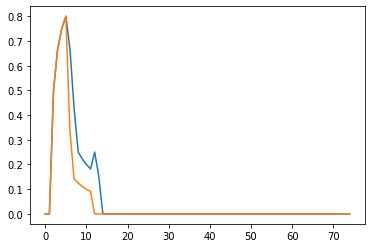

In [46]:
plt.plot(range(npat),save_11)
plt.plot(range(npat),save_22)


# 3.6 Sparse Patterns


In [47]:
def weight2(patterns, rho, scaling=False):
    [P,n]=np.shape(patterns)
    W=np.zeros((n,n))
    for i in range (n):
        for j in range(n):
            w = 0
            for mu in range(P):
                x_mu = patterns[mu]
                w = w + (x_mu[i]-rho)*(x_mu[j]-rho)
                W[i,j]= w
                
            if scaling==True:
                W[i,j]=W[i,j]/n
    return W


In [48]:

npat = 100
units = 50 

pat = np.zeros([npat,units])

rho = 0.2

count = int(npat*units*rho)

for i in range(count):
    idx = np.random.randint(0,npat)
    idxx = np.random.randint(0,units)
    pat[idx,idxx] = 1
   

In [49]:
nrThetas = 40
thetas = np.linspace(0,1,nrThetas,True)
save = np.zeros(len(thetas))
W = weight2(pat, rho,True)

for i, theta in enumerate(thetas): 
    success = 0
    for p in pat:        
        new_pat, iterations, energy = update_rule(W,p,"sparse", False,theta)
        if np.array_equal(p,new_pat):
            success += 1

    save[i] = success/npat
    print('on theta nr: {} out of {}'.format(i,nrThetas))
    
plt.plot(thetas,save)
plt.xlabel('Theta')
plt.ylabel('percentage stored')
plt.title('rho = {}'.format(rho))

TypeError: 'str' object is not callable